In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'Desktop\ex1data1.txt'


In [3]:
def dealData(path):
    data = pd.read_csv(path,header = None)
    y = data.iloc[:,len(data.columns)-1] 
    X = pd.concat([data.iloc[:,0:len(data.columns)-1],pd.DataFrame(np.ones(len(y)))],axis=1)
    X=X.iloc[:, ::-1]
    X.columns = ['ones','Data']
    thetas = np.ones(shape = (2,1))
    thetas = [0.000000001,0.00000001]
    return X,y,thetas

In [4]:
def plotData(func):
    X,y,t= func(path)
    _=plt.scatter(X.iloc[:,1],y)
    plt.show()

In [5]:
def computeCost(func):
    X,y,thetas = func(path)
    hypo = X.dot(thetas)
    y = (np.array(y).reshape(-1,1))
    cost = [(v-y[i])**2 for i,v in enumerate(hypo)]
    return sum(cost)/(2*len(y))

In [6]:
def gradientDescent(func,iters,alpha=0.01):
    X,y,thetas = func(path)
    thetas = np.array(thetas)
    hypo = X.dot(thetas)
    for iteri in range(iters):
        grad1 = alpha * sum([(v-y[i])*X.iloc[i,0] for i,v in enumerate(hypo)]) / len(y)
        grad2 = alpha *sum([(v-y[i])*X.iloc[i,1] for i,v in enumerate(hypo)]) / len(y)
        grad = np.array([grad1,grad2])
        thetas= thetas - grad
        hypo = X.dot(thetas)
    return thetas

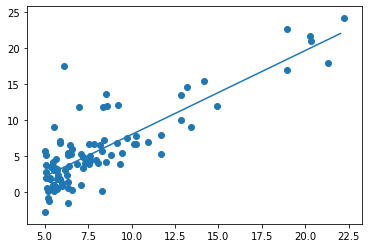

In [8]:
X,y,thetas = dealData(path)
x = np.arange(min(X.iloc[:,1]),max(X.iloc[:,1]))
y = -3.63029144 + 1.16636235 * x
_ = plt.plot(x,y)
X,y,t= dealData(path)
_=plt.scatter(X.iloc[:,1],y)
plt.show()